# 线性回归
### 线性回归利用数理统计中的回归分析来确定两种或两种以上变量间相互依赖的定量关系，其表达形式为：
### $$y=wx+b+e$$
### 误差e服从均值为0的正态分布。线性回归的损失函数为：
###  $$loss=1/2*\sum_{i=0}^{N}((wx_i+b)-y_i)^2$$

In [1]:
import torch as t
from torch.autograd import Variable as V
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

In [2]:
t.manual_seed(1000)
def get_fake_data(batch_size=8):
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    return x, y

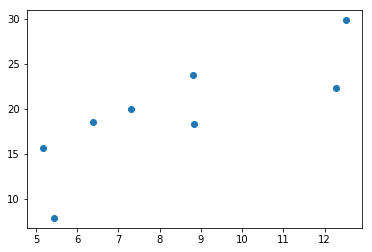

In [3]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [4]:
w = V(t.rand(1, 1), requires_grad=True)
b = V(t.rand(1, 1), requires_grad=True)
lr = 0.000001
print(w.data.numpy())
print(b)

[[0.3914578]]
tensor([[0.4430]], requires_grad=True)


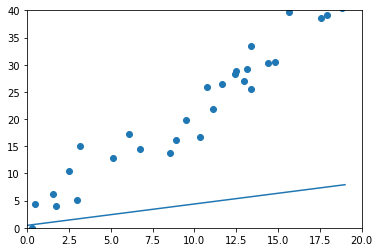

tensor([[0.3940]], requires_grad=True)
tensor([[0.4432]], requires_grad=True)


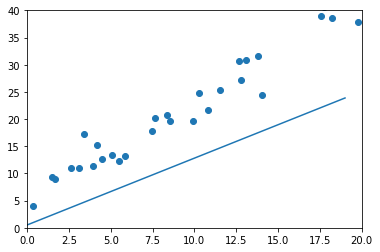

tensor([[1.2301]], requires_grad=True)
tensor([[0.5093]], requires_grad=True)


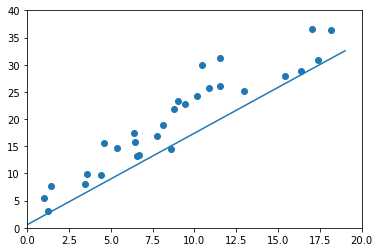

tensor([[1.6852]], requires_grad=True)
tensor([[0.5463]], requires_grad=True)


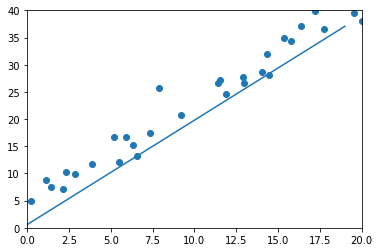

tensor([[1.9219]], requires_grad=True)
tensor([[0.5669]], requires_grad=True)


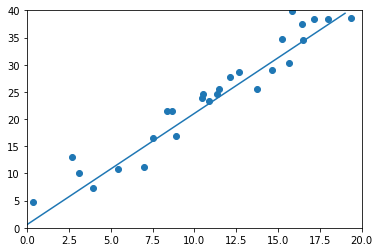

tensor([[2.0462]], requires_grad=True)
tensor([[0.5791]], requires_grad=True)


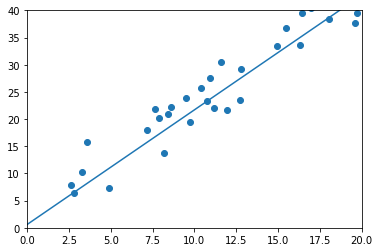

tensor([[2.1103]], requires_grad=True)
tensor([[0.5868]], requires_grad=True)


In [5]:
for ii in range(3600):
    x, y = get_fake_data()
    x, y = V(x), V(y)
    
    #forward: 计算loss
    y_pred = x * w + b
    loss = (0.5 * (y_pred - y) ** 2).sum()
    
    #backward: 自动计算梯度
    loss.backward()
    '''或者手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    '''
    
    #参数更新
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data
    
    #梯度清零, 自动计算梯度时，更新梯度后必须清零！！！！！！
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii % 600 == 0:
                    #绘图
        x = V(t.arange(0, 20).view(-1, 1)).float()
        #y = x.mm(w) + b.expand_as(x)
        y = x * w + b.expand_as(x)
        plt.plot(x.data.numpy(), y.data.numpy())       

        x2, y2 = get_fake_data(batch_size=32)
        plt.scatter(x2, y2)

        plt.xlim(0, 20)
        plt.ylim(0, 40)
        plt.show()
        print(w)
        print(b)
       